In [19]:
# implement libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [20]:
# load image
image_path = 'L.jpg'
input_image = cv.imread(image_path)
# global variable
output_image = np.copy(input_image)
kernel_size = (5,5)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, kernel_size)
 

In [21]:
# dilation filter
def dilation_filter():
    return cv.dilate(input_image, kernel, iterations=1)

In [22]:
# erosion filter
def erosion_filter():
    return cv.erode(input_image, kernel, iterations=1)

In [23]:
# opening filter (erosion followed by dilation)
def opening_filter():
    return cv.morphologyEx(input_image, cv.MORPH_OPEN, kernel)

In [24]:
# closing filter (dilation followed by erosion)
def closing_filter():
    return cv.morphologyEx(input_image, cv.MORPH_CLOSE, kernel)

In [25]:
# morphological gradient filter (difference between dilation and erosion)
def morphological_gradient_filter():
    return cv.morphologyEx(input_image, cv.MORPH_GRADIENT, kernel)

In [26]:
# top hat filter (difference between an input image and its opening)
def top_hat_filter():
    return cv.morphologyEx(input_image, cv.MORPH_TOPHAT, kernel)

In [27]:
# black hat filter (difference between the closing and its input image)
def black_hat_filter():
    return cv.morphologyEx(input_image, cv.MORPH_BLACKHAT, kernel)

In [28]:
# color detector detector
def color_detector():
    kernel = np.array((
            [-1, 0, -1],
            [0, -2, 0],
            [-1, 0, -1]), dtype="int")
    
    gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)
    output_image = cv.morphologyEx(gray_image, cv.MORPH_HITMISS, kernel)

    rate = 50
    kernel = (kernel + 1) * 127
    kernel = np.uint8(kernel)
    
    kernel = cv.resize(kernel, None, fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
    return kernel, output_image

In [29]:
# vertical and horizontal edges
def edges_filter():

    gray = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)
    gray = cv.bitwise_not(gray)
    bitwise_image = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, -2)

    horizontal = np.copy(bitwise_image)
    vertical = np.copy(bitwise_image)
    
    rows, columns = gray.shape

    horizontal_size = columns // 30
    vertical_size = rows // 30
 
    horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
 
    horizontal = cv.erode(horizontal, horizontalStructure)
    horizontal = cv.dilate(horizontal, horizontalStructure)
    
    verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, vertical_size))
 
    # Apply morphology operations
    vertical = cv.erode(vertical, verticalStructure)
    vertical = cv.dilate(vertical, verticalStructure)
    
    return horizontal, vertical

In [30]:
# plot output images
def plot_images(images, images_title):
    plt.figure(figsize=(40, 20)) 
    for i in range(len(images)):
        plt.subplot(3, 4, i + 1) 
        img_rgb = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)
        plt.imshow(img_rgb) 
        plt.title(images_title[i])  
        plt.axis('off')  # Hide the axes to make it cleaner

    plt.tight_layout()
    plt.show() 

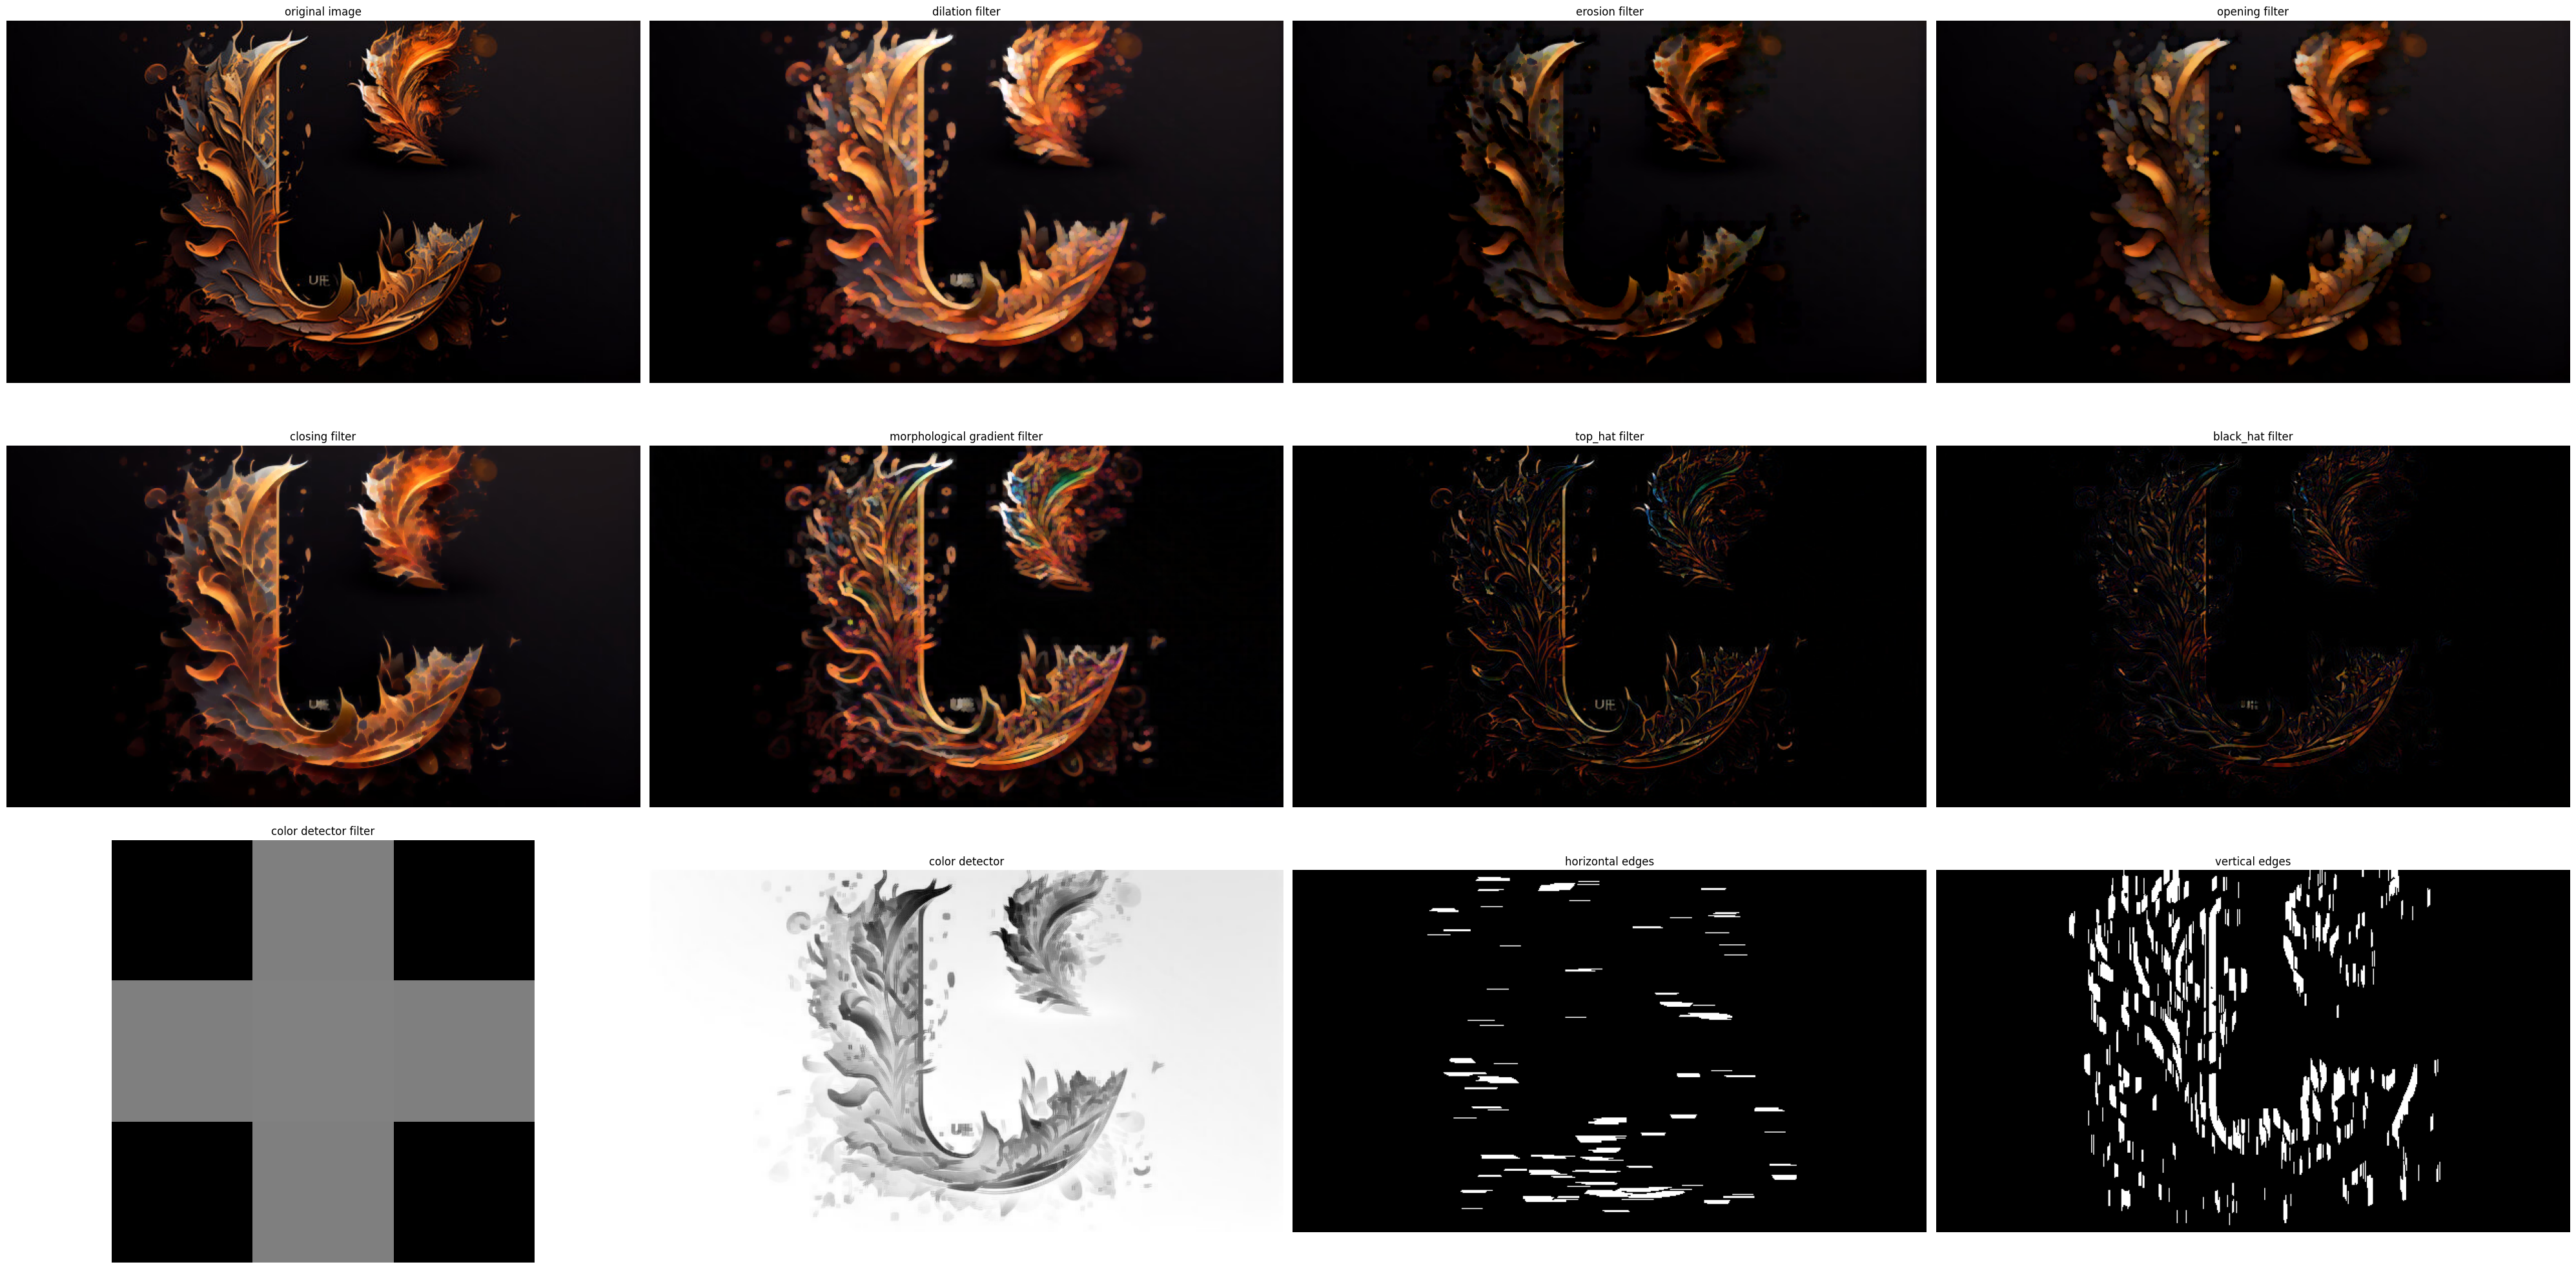

In [32]:
color_detector_filter, color_detector_visualization = color_detector()
horizontal_filter, vertical_filter = edges_filter()
images = [input_image, dilation_filter() ,erosion_filter(), opening_filter(), closing_filter(), morphological_gradient_filter(), top_hat_filter(), black_hat_filter(), color_detector_filter, color_detector_visualization, horizontal_filter, vertical_filter]
images_title = ['original image','dilation filter' ,'erosion filter', 'opening filter', 'closing filter', 'morphological gradient filter', 'top_hat filter', 'black_hat filter', 'color detector filter', 'color detector', 'horizontal edges', 'vertical edges']
plot_images(images, images_title)